# Figure 1. 

In [1]:
%reset
#%qtconsole
%load_ext autoreload
%autoreload 2
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib as mpl
import scipy.stats as stats

data_dir = './../../DataAndScripts/experimental_data/'

data_monkeys=np.loadtxt(data_dir+'Monkeys_with_trials.txt');
data_mice=np.loadtxt(data_dir+'Mice_with_trials.txt');


# structure of data set is:
# unit number, contrast, laser, rate, other stuff

DATA=[data_mice,data_monkeys]
species=['Mice','Monkeys']
color=['c','m']
bin_edges=np.arange(-300,300,0.1) 
bin_means=(bin_edges[1::]+bin_edges[0:-1])/2   


area=4.0;linethicknes=1.0;
font = {'family' : 'normal','weight' : 'normal','size'   : 7, 'family':'serif','serif':['Arial']}
mpl.rc('font', **font)
mpl.rcParams['lines.linewidth'] =linethicknes
mpl.rcParams['text.usetex'] = False
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rcParams['pdf.fonttype'] = 42

N_stat=10**5;

def phi(x):
    return (0.5*(x+np.abs(x)))


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
for idx_species in [0,1]:
    data=DATA[idx_species]
    Con=np.unique(data[:,1])
    print(Con)

[ 0.  8. 13. 21. 34. 55. 90.]
[ 0.  6. 12. 25. 50. 99.]


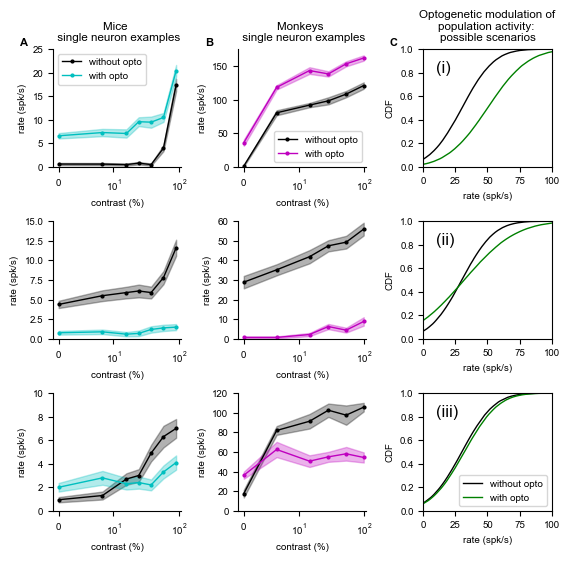

In [5]:
rows=3
cols=3
#fig, axs = plt.subplots(rows,cols, figsize=(8.5,11), facecolor='w', edgecolor='k')
fig, axs = plt.subplots(rows,cols, figsize=(1.875*cols,1.875*rows), 
                        facecolor='w', edgecolor='k')#,sharex='col')
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()


axs[0].text(-.2, 1.1,'A', transform=axs[0].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
axs[1].text(-.2, 1.1,'B', transform=axs[1].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
axs[2].text(-.2, 1.1,'C', transform=axs[2].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
#axs[6].text(-.2, 1.1,'D', transform=axs[5].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
#axs[8].text(-.2, 1.1,'E', transform=axs[8].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');


for idx in [0,1,3,4,6,7]:
    axs[idx].spines['top'].set_visible(False)
    axs[idx].spines['right'].set_visible(False)

    
idx_laser=-1
for idx_species in [0,1]:
    data=DATA[idx_species]
    Con=np.unique(data[:,1])
    Las=np.unique(data[:,2])
    cells_id=np.unique(data[:,0]);

    Cell=[];Contrast=[];Base=[];Resp=[];eBase=[];eResp=[];

    for idx_cell in range(len(cells_id)):
        for idx_con in range(len(Con)):
            mask_no_L=(data[:,0]==cells_id[idx_cell])&(data[:,2]==Las[0])&(data[:,1]==Con[idx_con])
            mask_L=(data[:,0]==cells_id[idx_cell])&(data[:,2]==Las[idx_laser])&(data[:,1]==Con[idx_con])
            Cell=Cell+[idx_cell]
            Contrast=Contrast+[data[mask_L,1]]
            Trial_Base=data[mask_no_L,3::]
            Trial_Resp=data[mask_L,3::]
            Base=Base+[np.mean(Trial_Base[np.isnan(Trial_Base)==False])]
            Resp=Resp+[np.mean(Trial_Resp[np.isnan(Trial_Resp)==False])]
            eBase=eBase+[stats.sem(Trial_Base[np.isnan(Trial_Base)==False])]
            eResp=eResp+[stats.sem(Trial_Resp[np.isnan(Trial_Resp)==False])]

    Cell,Contrast,Base,Resp=np.asarray(Cell),np.asarray(Contrast),np.asarray(Base),np.asarray(Resp)
    eBase,eResp=np.asarray(eBase),np.asarray(eResp)

    
    # Panels A: example cells
    if idx_species==0:
        ymax=[25,15,10]
        example_cells=[25,45,49]
        title='Mice \n single neuron examples'
    if idx_species==1:
        ymax=[175,60,120]
        example_cells=[0,21,54]
        title='Monkeys \n single neuron examples'
    axs[idx_species].set_title(title)    
    for idx in range(3):
        mask=Cell==example_cells[idx]
        axs[3*idx+idx_species].plot(Contrast[mask],Base[mask],marker='o',c='k',markersize=2,label='without opto')
        axs[3*idx+idx_species].plot(Contrast[mask],Resp[mask],marker='o',c=color[idx_species],markersize=2,label='with opto')
        axs[3*idx+idx_species].fill_between(Con,Base[mask]-eBase[mask],Base[mask]+eBase[mask],color='k',alpha=0.3)
        axs[3*idx+idx_species].fill_between(Con,Resp[mask]-eResp[mask],Resp[mask]+eResp[mask],color=color[idx_species],alpha=0.3)
        #axs[3*idx+idx_species].errorbar(Contrast[mask],Base[mask],eBase[mask],marker='o',c='k',markersize=2)
        #axs[3*idx+idx_species].errorbar(Contrast[mask],Resp[mask],eResp[mask],marker='o',c=color[idx_species],markersize=2)
        
        axs[3*idx+idx_species].set_xscale('symlog', linthresh=12)
        axs[3*idx+idx_species].axis([-1.,110,0,ymax[idx]])
        axs[3*idx+idx_species].set_ylabel('rate (spk/s)')
        axs[3*idx+idx_species].set_xlabel('contrast (%)')

    
axs[0].legend(loc='best')
axs[1].legend(loc='best')
    
    
mu=30;S_mu=20;
text=['(i)','(ii)','(iii)']
for idx_cases in range(3):
    if idx_cases==0:
        delta_mu=20;S_delta_mu=15;Cov_mu_delta_mu=0;
    if idx_cases==1:
        delta_mu=2;S_delta_mu=25;Cov_mu_delta_mu=0;
    if idx_cases==2:
        delta_mu=2;S_delta_mu=30;Cov_mu_delta_mu=-0.48*S_delta_mu**2;

    Mean_Mat=[mu,delta_mu]
    Cov_Mat=np.zeros((2,2))
    Cov_Mat[0,0],Cov_Mat[1,1]=S_mu**2,S_delta_mu**2
    Cov_Mat[1,0],Cov_Mat[0,1]=Cov_mu_delta_mu,Cov_mu_delta_mu
    mu_i, delta_mu_i = np.random.multivariate_normal(Mean_Mat, Cov_Mat, N_stat).T
    r_i=phi(mu_i)
    r_L_i=phi(mu_i+delta_mu_i)
    delta_r_i=r_L_i-r_i


    hist=np.histogram(r_i,bin_edges,density=True)
    axs[3*idx_cases+2].plot(bin_means,np.cumsum(hist[0])*np.diff(bin_edges),c='k',label='without opto')
    hist=np.histogram(r_L_i,bin_edges,density=True)
    axs[3*idx_cases+2].plot(bin_means,np.cumsum(hist[0])*np.diff(bin_edges),c='g',label='with opto')
    axs[3*idx_cases+2].axis([0,100,0,1])

    axs[3*idx_cases+2].set_xlabel('rate (spk/s)')
    axs[3*idx_cases+2].set_ylabel('CDF')
    if idx_cases==2:
        axs[3*idx_cases+2].legend(loc='lower right')
    axs[3*idx_cases+2].text(10,0.8,text[idx_cases], fontsize=12)

axs[2].set_title('Optogenetic modulation of\npopulation activity: \npossible scenarios')    
plt.tight_layout()
fig.set_size_inches(1.875*cols,1.875*rows)
pic_name='Figure_1.pdf'
fig.savefig(pic_name,format='pdf',bbox_inches='tight')
pic_name='Figure_1.png'
fig.savefig(pic_name,format='png',bbox_inches='tight', dpi=300)

    
    

## 